# Introduction

- In this assignemnt, the task is to implement some basic ML-Alogrithms to classify images
- We have provided with empty blocks and/or function prototypes, i.e. function name, its input and output. You will need to implement the body of the function.
- Write your code/answer below  `# TODO: Your code here ` statement.
- Do not delete or modify the portions of code given.

**Attention**:
- *python3.x is preferred to be used in this assignment.*
- *You do not need a GPU to for this assignment. CPU is enough.*
- *You can add codes whereever needed but please do not change the inputs arguments of the functions, otherwise your implementation would fail to pass the test.*
- *Please ensure that you are running SciPy v1.14.1 and NumPy v1.18.1 to avoid compatibility issues.*
- You will need to install opencv-python module for cv2 module in FisherFace.py to work: pip install opencv-python
- Unzip face.zip into its face folder before use.

**Run the codes below to get the structure as defined below**

In [1]:
import FisherFace
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import math
import random
import shutil
from sklearn.model_selection import train_test_split
from collections import defaultdict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

ModuleNotFoundError: No module named 'FisherFace'

In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install FisherFace

ERROR: Could not find a version that satisfies the requirement FisherFace (from versions: none)
ERROR: No matching distribution found for FisherFace
Note: you may need to restart the kernel to use updated packages.


***Sample code to read faces from the database path***

In [3]:
## Get the data
database_path = "./face/"
faces, ids = FisherFace.read_faces(database_path)

## Check the data shapes
## Note: `faces` HAS THE WHOLE DATABASE, NOT SPLIT INTO TRAIN & TEST
print(faces.shape, ids.shape)

(22400, 240) (240,)


### Task 1: Understand the data and answer the following questions (3 marks)


**Question 1** How many instances, and how many classes in this dataset? **(1 mark)**

In [4]:
# TODO: Your code here

# list the files
face_images = [x for x in os.listdir('./face/') if x.endswith('.bmp')]

# group images by person id. 
#the key of dict is person id, value is list of images
person_id_to_images = {}

for face_image in face_images:
    full_path = os.path.join('./face', face_image)
    face_image = face_image[:-3]
    person_identity, orientation, contrast =  face_image.split('_')
    if not person_identity in person_id_to_images:
        person_id_to_images[person_identity] = []    
    person_id_to_images[person_identity].append(full_path)

In [5]:
image_number = set()
for person_id, images in person_id_to_images.items():
    image_number.add(len(images))

In [6]:
image_number

{24}

# the number of instances is 24

In [7]:
people = set()

for face_image in face_images:
    face_image = face_image[:-3]
    person_identity, orientation, contrast =  face_image.split('_')
    people.add(person_identity)

In [8]:
len(face_images)

240

# the number of classes is 240

# the number of instances is 24 and the number of classes is 240

**Question 2** What is the shape of each image instance? **(1 mark)**

In [9]:
# TODO: Your code here

image = cv2.imread('./face/04010_27_00.bmp')
print(image.shape)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

(160, 140, 3)


# the shape of each image instance is 160, 140, 3

**Question 3**  Does this dataset have balanced classes?  **(1 mark)**

In [11]:
# TODO: Your code here


In [12]:
person_id_to_images

{'04019': ['./face/04019_27_17.bmp',
  './face/04019_27_03.bmp',
  './face/04019_27_02.bmp',
  './face/04019_27_16.bmp',
  './face/04019_27_00.bmp',
  './face/04019_27_14.bmp',
  './face/04019_27_15.bmp',
  './face/04019_27_01.bmp',
  './face/04019_27_05.bmp',
  './face/04019_27_11.bmp',
  './face/04019_27_10.bmp',
  './face/04019_27_04.bmp',
  './face/04019_27_12.bmp',
  './face/04019_27_06.bmp',
  './face/04019_27_07.bmp',
  './face/04019_27_13.bmp',
  './face/04019_27_22.bmp',
  './face/04019_27_23.bmp',
  './face/04019_27_09.bmp',
  './face/04019_27_21.bmp',
  './face/04019_27_20.bmp',
  './face/04019_27_08.bmp',
  './face/04019_27_18.bmp',
  './face/04019_27_19.bmp'],
 '04014': ['./face/04014_27_14.bmp',
  './face/04014_27_00.bmp',
  './face/04014_27_01.bmp',
  './face/04014_27_15.bmp',
  './face/04014_27_03.bmp',
  './face/04014_27_17.bmp',
  './face/04014_27_16.bmp',
  './face/04014_27_02.bmp',
  './face/04014_27_06.bmp',
  './face/04014_27_12.bmp',
  './face/04014_27_13.bmp',
 

In [13]:
people, len(people)

({'04010',
  '04011',
  '04012',
  '04013',
  '04014',
  '04015',
  '04016',
  '04017',
  '04018',
  '04019'},
 10)

# each data set has 10 items hence it is a balance dataset

### Task 2: Visualize the Data (3 marks)
- For each of the persons, visualize 2 face images with matplotlib subplot grid.

In [14]:
# TODO: Your code here
# after running this code-block, there should be a visualization of two faces for each person in the dataset
# sample answers given below.

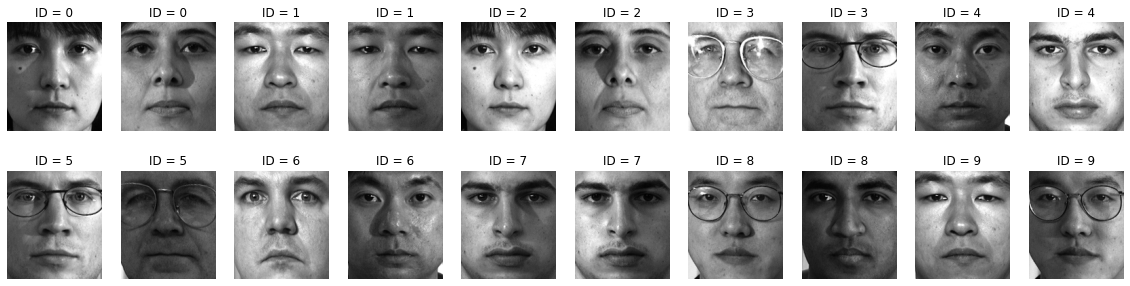

In [15]:
fig = plt.figure(figsize=(20, 5))
cols = 10
rows = 2

ax = []

for i in range(cols*rows):
    image1 = faces.T[i*12].reshape(160,140)
    image2 = faces.T[i*12+1].reshape(160,140)
    
    ax.append(fig.add_subplot(rows, cols, i+1))
    ax[-1].set_title("ID = " + str(i//2), fontsize=12)  
    plt.axis('off')
    plt.imshow(image1, cmap="gray")
    plt.imshow(image2, cmap="gray")
    
plt.show()

### Task 3: Randomly split your data into Train, Test set (4 marks)

There are 24 images for each person. 
- Randomly split these into two sets of equal size. That is, your train and test sets will have 12 images for each per person.
- Read `train` and `test` faces using `FisherFace.read_faces(path)`.

In [16]:
SEED = 42

def get_train_test_faces(database_path, train_ratio=0.8):
    """
    Split data and return train, test and validation splits
    INPUT: train_ratio : Percentage of training data required in total, test_ratio = 1.00 - train_ratio
    RETURN: train_faces, train_ids, test_faces, test_ids
    HINT: first list the images in the database, 
          group into each classes, 
          then randomly choose from each classes according to train_ratio,
          copy and store those face images in two folders: 'train' and 'test',
          use `FisherFace.read_faces(path)` for reading face
          [This hint is just a suggestion, you can use your own technique]
    """
        
    person_to_full_path = defaultdict(list)
    person_to_number_images = {}
    
    train_faces = [] 
    test_faces = [] 
    
    
    for x in os.listdir(database_path):
        # to ensure only bmp file is used
        if x.endswith('.bmp'):            
            full_path = os.path.join('./face', x)
            face_image = x[:-3]
            person_identity, orientation, contrast =  x.split('_')
            person_to_full_path[person_identity].append(full_path)                
    
    for person_id, image_list in person_to_full_path.items():
        random.shuffle(image_list)
        image_len = len(image_list)
        
        train_size = math.floor(train_ratio * image_len)
        train_faces.extend(image_list[:train_size])
        test_faces.extend(image_list[train_size:])
        
    os.makedirs('./train')
    os.makedirs('./test')
    
    for x in train_faces:
        shutil.copyfile(x, os.path.join('./train', os.path.basename(x)))
    for x in test_faces:
        shutil.copyfile(x, os.path.join('./test', os.path.basename(x)))

    train_faces, train_ids = FisherFace.read_faces('./train')
    test_faces, test_ids = FisherFace.read_faces('./train')
                        
    return train_faces, train_ids, test_faces, test_ids
    
train_faces, train_ids, test_faces, test_ids = get_train_test_faces(database_path=database_path, train_ratio=0.5)
print(train_faces.shape, train_ids.shape)
print(test_faces.shape, test_ids.shape)

(22400, 120) (120,)
(22400, 120) (120,)


### Compute PCA

In [17]:
def train_PCA(data, D):
    """
    'data': self explanatory
    'D': Projection dimension, we retain only top 'D' eigenfaces
    
    RETURN
    'W': PCA projection matrix
    'LL': eigenvalues
    'm': global mean vector
    """
    W, LL, m = FisherFace.myPCA(data)
    W = W[:,:D]
    return W, LL, m

def get_face_features(data, W, m):
    r, c = data.shape
    mean_faces = data - np.tile(m, (c, 1)).T
    features = np.dot(W.T, mean_faces)
    return features

### Task 4: Compute PCA feature from face images (3 marks)

**Compute PCA feature from face images.**

Use the code in the block above to:
1. Train PCA Projection Matrix from the `train_faces` using the function in the block above: `train_PCA(data, D)`.
2. Get the `train` and `test` face-features using the function `get_face_features(data, W, m)`.

In [18]:
# Train PCA projection matrix, use the projection matrix for computing features
# TODO: Your code here

W, LL, m = train_PCA(test_faces,200)

# Compute the train features
# TODO: Your code here

test_features = get_face_features(test_faces, W, m)

# Compute the test features
# TODO: Your code here

train_features = get_face_features(train_faces, W, m)

### Task 5: Train the sklearn KNN to classify the images (4 marks)
- Use scikit learn to train kNN classifiers with this training set by varying the value for `k` (k = 3, 5, 7). 
- Evaluate the classifier with the test dataset by computing the accuracy for each classifier.

In [19]:
train_features.T.shape    

(120, 119)

In [20]:
train_ids.shape

(120,)

In [21]:
# Predict with KNN classifier
def kNearestNeighbors(k, train_features, train_labels, test_features, test_labels):
    """
    'k': number of neighbors
    'train_features': train face features
    'train_labels': train data labels
    'test_features': test face features
    'test_labels': test data labels

    RETURN
    'accuracy': floating point value, accuracy of the model on `test_features`
    """

    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(train_features.T, train_ids)
    predicted_labels = neigh.predict(test_features.T)
    return accuracy_score(test_ids, predicted_labels)  

In [22]:
# Evaluate accuracy for each kNN models. Print the accuracy values.
k_list = [3, 5, 7]  # fill up the list
acc_list_knn = []
for k in k_list:
    # TODO: Your code here
    acc = kNearestNeighbors(k, train_features, train_ids, test_features, test_ids)
    acc_list_knn.append(acc.mean()) 
    
    print(f'{k=}, {acc=: .2f}')

k=3, acc= 0.95
k=5, acc= 0.86
k=7, acc= 0.78


In [23]:
print(acc_list_knn)

[0.95, 0.8583333333333333, 0.775]


In [24]:
print(k_list)

[3, 5, 7]


In [25]:
print(acc)

0.775


### Task 6: Visualize your results from KNN (5 marks)

**Question 1**: Plot `k` value vs `accuracy`

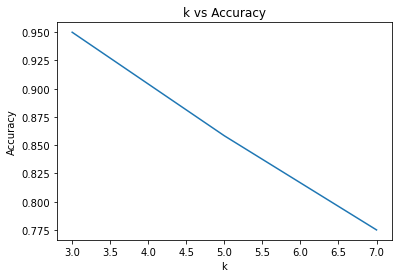

In [26]:
# plot k value vs accuracy

plt.title('k vs Accuracy')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.plot(k_list,acc_list_knn)

**Question 2**: Calculate the confusion matrix for `k = 5`.

In [27]:
# TODO: Your code here

In [28]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(train_features.T, train_ids)
predicted_labels = neigh.predict(test_features.T)
accuracy_score(test_ids, predicted_labels) 

0.8583333333333333

In [29]:
acc = kNearestNeighbors(5, train_features, train_ids, test_features, test_ids)

In [30]:
test_features = get_face_features(test_faces, W, m)

In [31]:
test_features.T.shape

(120, 119)

In [32]:
test_ids.T.shape

(120,)

In [33]:
test_faces.shape

(22400, 120)

In [34]:
predicted_labels.shape

(120,)

In [35]:
cm = confusion_matrix(test_ids.T, predicted_labels)
print(cm)

[[11  0  0  0  0  0  0  0  1  0]
 [ 0 11  1  0  0  0  0  0  0  0]
 [ 0  0 12  0  0  0  0  0  0  0]
 [ 0  0  3  9  0  0  0  0  0  0]
 [ 0  0  0  0 11  0  0  0  1  0]
 [ 1  0  0  0  0 10  0  0  1  0]
 [ 0  0  0  0  1  0 10  0  1  0]
 [ 0  0  0  0  0  0  0 11  1  0]
 [ 1  0  0  0  2  0  0  0  9  0]
 [ 0  0  3  0  0  0  0  0  0  9]]


**Question 3**: Find the 5 nearest neighbors for one of the faces from the test set and visualize them.

*You can use any of the kNN models, and choose any of the faces for this question*.

In [36]:
# Find the 5 nearest neighbors for the first data of the test set and visualize them 

# TODO: Your code here

In [37]:
# Train PCA projection matrix, use the projection matrix for computing features
# TODO: Your code here

W, LL, m = train_PCA(test_faces,6)

# Compute the train features
# TODO: Your code here

test_features = get_face_features(test_faces, W, m)

# Compute the test features
# TODO: Your code here

train_features = get_face_features(train_faces, W, m)

In [38]:
from sklearn.neighbors import NearestNeighbors
nearestneighbors_euclidean = NearestNeighbors(n_neighbors=6, metric = 'euclidean').fit(test_features)

dist, indices = nearestneighbors_euclidean.kneighbors([test_features[0]])

test_features[indices]

array([[[ 1.28297807e+03,  2.30600820e+02, -9.92931411e+03,
          2.00603164e+03, -1.56155767e+03,  9.20699097e+03,
          5.57600963e+02,  1.00958465e+03, -2.21186081e+02,
          8.54808491e+02,  3.30823366e+03,  1.30949281e+03,
          8.44457012e+03,  5.95053186e+03,  5.72921238e+02,
          1.56431471e+03,  9.56707532e+03, -3.09964143e+03,
         -8.95507043e+03, -7.80516564e+03,  1.07532668e+04,
          4.78970523e+03,  4.35557833e+03,  1.07646485e+04,
         -8.12900422e+03, -2.57517323e+03,  5.53149321e+02,
         -1.19907237e+04, -3.95408823e+03,  3.37967380e+03,
          8.66441097e+03,  1.27010832e+04,  3.08781891e+03,
          4.01610675e+03,  1.41453463e+03, -2.81922688e+02,
          1.69553884e+03,  1.49495911e+02, -8.51867613e+01,
         -2.75462725e+03, -7.52988825e+03,  8.21942683e+03,
         -3.14444783e+02, -1.78693565e+03,  2.78361258e+03,
          2.26341278e+02,  8.74898479e+03, -2.81906812e+03,
          1.19575453e+03, -2.45125266e+0

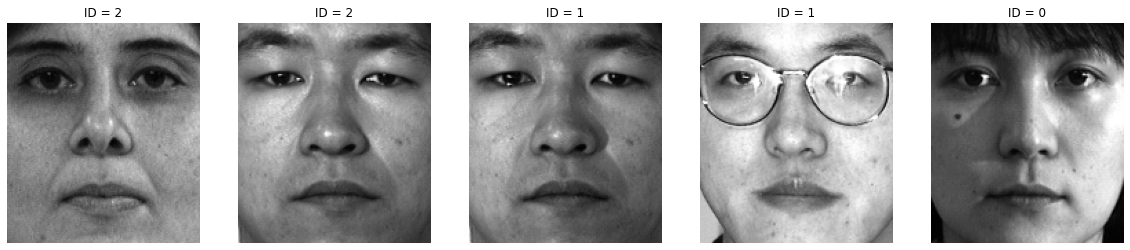

In [39]:
neigh = NearestNeighbors(n_neighbors = 6, metric = 'euclidean').fit(test_features)
nearest_neigh = neigh.kneighbors([test_features[0]], return_distance = False)[0,1:].tolist()

fig = plt.figure(figsize=(20, 5))
cols = 5
rows = 1

ax = []
n = 0
for i in nearest_neigh:
    img = test_faces.T[i].reshape(160,140)
    ax.append(fig.add_subplot(rows, cols, n+1))
    ax[-1].set_title("ID = " + str(i//2), fontsize=12) 
    n = n+1
    plt.axis('off')
    plt.imshow(img, cmap="gray")

In [40]:
# Train PCA projection matrix, use the projection matrix for computing features
# TODO: Your code here

W, LL, m = train_PCA(test_faces,1)

# Compute the train features
# TODO: Your code here

test_features = get_face_features(test_faces, W, m)

# Compute the test features
# TODO: Your code here

train_features = get_face_features(train_faces, W, m)

### Task 7: Train the sklearn Random Forest to classify the images (4 marks)
- Use scikit learn to train a **Random Forest classifier** for the same training set. 
- Change different values for the parameter `n_estimators` in the Random Forest.

In [41]:
def RandomForest(n_estimators, train_features, train_labels, test_features, test_labels):
    """
    'n_estimators': number of estimators
    'train_features': train face features
    'train_labels': train data labels
    'test_features': self explanatory
    'test_labels': test data labels

    RETURN
    'accuracy': floating point value, accuracy of the model on `test_features`
    """
    
    # TODO: Your code here
    clf = RandomForestClassifier(n_estimators=10)
    clf.fit(train_features.T, train_ids)
    pred = clf.predict(test_features.T)
    return accuracy_score(test_ids, pred)  

In [42]:
# Changing different values for the parameter `n_estimators` in the Random Forest. Print the accuracy values.
n_est_list = [20, 40, 60, 80, 100, 120]  # fill up the list
acc_list_rf = []
for n_est in n_est_list:
    # TODO: Your code here

    acc = RandomForest(n_est, train_features, train_ids, test_features, test_ids)
    acc_rounded = round(acc, 2)
    acc_list_rf.append(acc) 
    
    print(f'{n_est=}, {acc=: .2f}')

n_est=20, acc= 0.93
n_est=40, acc= 0.91
n_est=60, acc= 0.95
n_est=80, acc= 0.92
n_est=100, acc= 0.95
n_est=120, acc= 0.93


In [43]:
print(acc)

0.925


In [44]:
print(n_est_list)

[20, 40, 60, 80, 100, 120]


In [45]:
print(acc_list_rf)

[0.925, 0.9083333333333333, 0.95, 0.9166666666666666, 0.95, 0.925]


### Task 8: Visualize your results from Random Forest (4 marks)

**Question 1**: Visualize the change in accuracy when `n_estimators` is changed as above. 

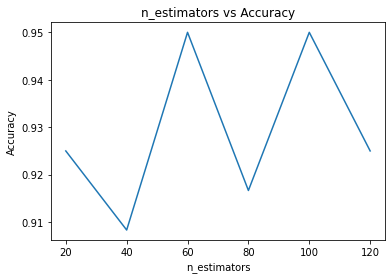

In [46]:
# TODO: Your code here

plt.title('n_estimators vs Accuracy')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.plot(n_est_list,acc_list_rf)

**Question 2**: Calculate the confusion matrix for `n_estimators = 100`.

In [47]:
# TODO: Your code here

clf = RandomForestClassifier(n_estimators=100)
clf_100 = clf.fit(train_features.T, train_ids)
pred = clf_100.predict(test_features.T)

mat = confusion_matrix(test_ids.T, pred)

print(mat)

[[12  0  0  0  0  0  0  0  0  0]
 [ 0 12  0  0  0  0  0  0  0  0]
 [ 0  0 12  0  0  0  0  0  0  0]
 [ 0  0  0 12  0  0  0  0  0  0]
 [ 0  0  0  0 12  0  0  0  0  0]
 [ 0  0  0  0  0 12  0  0  0  0]
 [ 0  0  0  0  0  0 12  0  0  0]
 [ 0  0  0  0  0  0  0 12  0  0]
 [ 0  0  0  0  0  0  0  0 12  0]
 [ 0  0  0  0  0  0  0  0  0 12]]


**Question 3**: Visualize 10 test face images randomly along with their predicted values.

In [48]:
# TODO: Your code here

choose_faces_index = random.sample(range(0, 119), 10) 
choose_faces_features = []
choose_faces_i_pred = []

print(choose_faces_index)

sd = test_features.T
for i in choose_faces_index:
    choose_faces_features.append(sd[i])  
    
i_pred = clf_100.predict(np.array(choose_faces_features))

[21, 5, 75, 30, 76, 57, 28, 26, 60, 10]


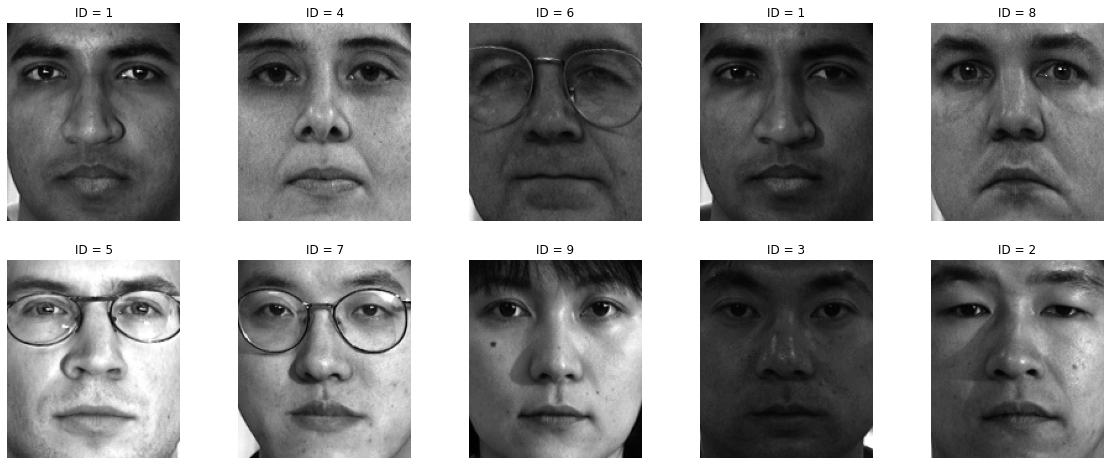

In [49]:
#Visualize 10 test face images randomly along with predicted values

fig = plt.figure(figsize=(20, 8))
cols = 5
rows = 2

ax = []
n = 0
for i in choose_faces_index:
    img = test_faces.T[i].reshape(160,140)
    ax.append(fig.add_subplot(rows, cols, n+1))
    ax[-1].set_title("ID = " + str(i_pred[n]), fontsize=12) 
    n = n+1
    plt.imshow(img, cmap="gray")
    plt.axis('off')

### END OF ASSIGNMENT